In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load processed data
data = pd.read_csv('ProcessedData.csv')

In [3]:
# make Date the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [4]:
# for now we will only use VIX Close, WTI Spot Price, IT Adj Close_Return, HC Adj Close_Return AND CD Adj Close_Return, IT Volume, HD Volume, CD Volume
data = data[['VIX Close', 'WTI Log Daily Change', 'IT_Log_Return', 'HC_Log_Return', 'CD_Log_Return', 'IT Volume', 'HC Volume', 'CD Volume']]
# rename VIX Close to VIX, IT Adj Close_Return to IT Daily Return, HC Adj Close_Return to HC Daily Return, CD Adj Close_Return to CD Daily Return
data.rename(columns={'VIX Close': 'VIX'})#, 'IT_Log_Return': 'IT Daily Return', 'HC Adj Close_Return': 'HC Daily Return', 'CD Adj Close_Return': 'CD Daily Return'}, inplace=True)

,VIX,WTI Log Daily Change,IT_Log_Return,HC_Log_Return,CD_Log_Return,IT Volume,HC Volume,CD Volume
Date,,,,,,,,
1993-05-05,12.38,0.002937,0.008621,0.008757,-0.002610,0,0,0
1993-05-06,13.22,0.001465,-0.006131,-0.013274,-0.003120,0,0,0
1993-05-07,13.01,-0.002933,0.008729,-0.004760,-0.000605,0,0,0
1993-05-10,13.72,-0.000490,-0.000779,0.001220,0.005332,0,0,0
1993-05-11,13.35,-0.001961,-0.006381,0.002877,0.002706,0,0,0
...,...,...,...,...,...,...,...,...
2025-04-22,30.57,0.017490,0.024226,0.017848,0.031825,806867100,223050800,472384400
2025-04-23,28.45,-0.030810,0.028758,0.005340,0.027267,978415600,280000500,591385400
2025-04-24,26.47,0.014423,0.034781,0.012289,0.022318,938353200,254195200,431896300


In [5]:
# remame HC Daily Return to Health Care Daily Return, CD Daaily Return to Consumer Discretionary Daily Return, IT Daily Return to Information Technology Daily Return
data.rename(columns={'HC_Log_Return': 'Health Care Daily Log Return', 'CD_Log_Return': 'Consumer Discretionary Daily Log Return', 'IT_Log_Return': 'Information Technology Daily Log Return'}, inplace=True)

In [6]:
data[['VIX Close', 'WTI Log Daily Change']].corr()

,VIX Close,WTI Log Daily Change
VIX Close,1.000000,-0.054813
WTI Log Daily Change,-0.054813,1.000000


In [7]:
data

,VIX Close,WTI Log Daily Change,Information Technology Daily Log Return,Health Care Daily Log Return,Consumer Discretionary Daily Log Return,IT Volume,HC Volume,CD Volume
Date,,,,,,,,
1993-05-05,12.38,0.002937,0.008621,0.008757,-0.002610,0,0,0
1993-05-06,13.22,0.001465,-0.006131,-0.013274,-0.003120,0,0,0
1993-05-07,13.01,-0.002933,0.008729,-0.004760,-0.000605,0,0,0
1993-05-10,13.72,-0.000490,-0.000779,0.001220,0.005332,0,0,0
1993-05-11,13.35,-0.001961,-0.006381,0.002877,0.002706,0,0,0
...,...,...,...,...,...,...,...,...
2025-04-22,30.57,0.017490,0.024226,0.017848,0.031825,806867100,223050800,472384400
2025-04-23,28.45,-0.030810,0.028758,0.005340,0.027267,978415600,280000500,591385400
2025-04-24,26.47,0.014423,0.034781,0.012289,0.022318,938353200,254195200,431896300


### EVT

Health Care Daily Log Return: Shape = 0.4403, Scale = 0.0067
Information Technology Daily Log Return: Shape = 0.4477, Scale = 0.0095
Consumer Discretionary Daily Log Return: Shape = 0.4820, Scale = 0.0078


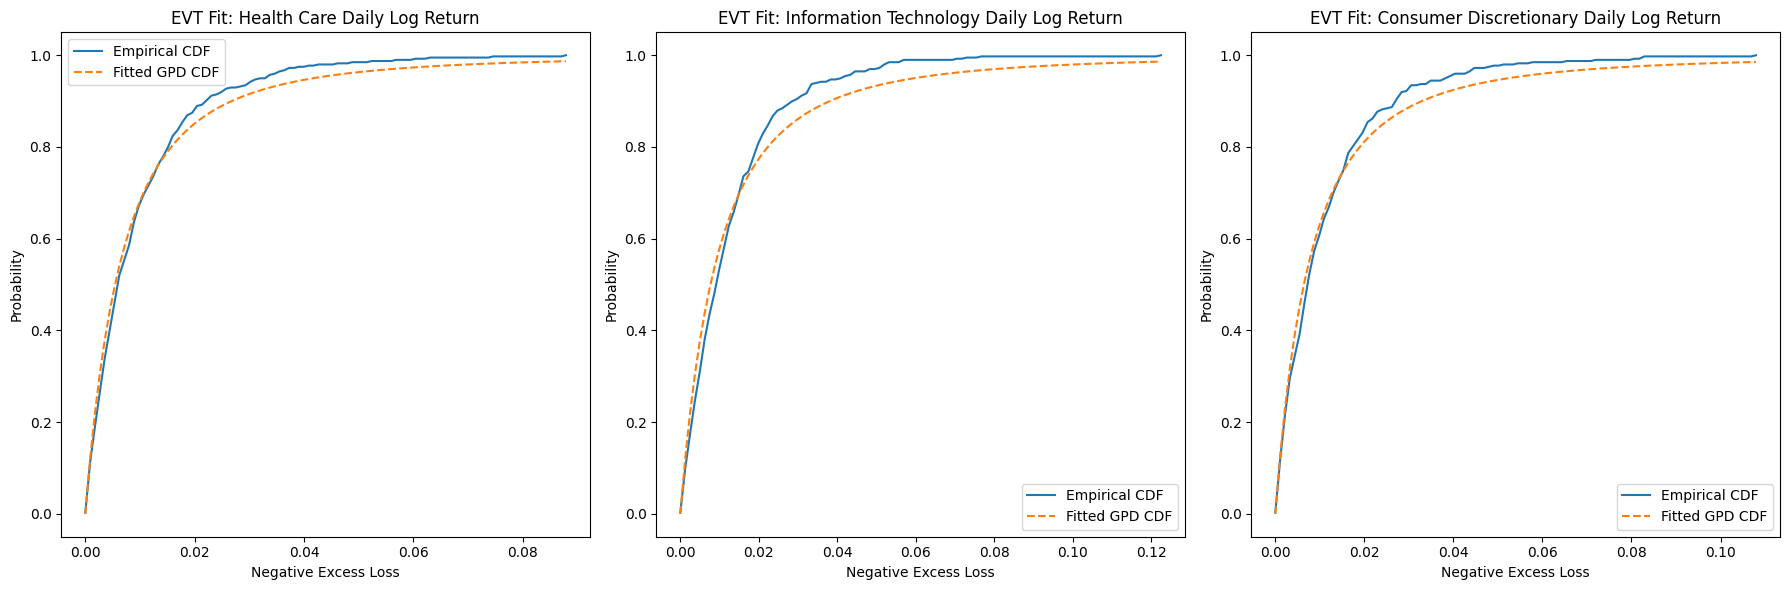

In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import genpareto

# Define the sectors
#sectors = ['Health Care Daily Return', 'Information Technology Daily Return', 'Consumer Discretionary Daily Return']
sectors = ['Health Care Daily Log Return', 'Information Technology Daily Log Return', 'Consumer Discretionary Daily Log Return']


# Threshold for POT (e.g., 5th percentile)
thresholds = {sector: np.percentile(data[sector], 5) for sector in sectors}

# Fit GPD for extreme losses in each sector
gpd_params = {}
for sector in sectors:
    excess_losses = data[data[sector] < thresholds[sector]][sector] - thresholds[sector]
    shape, loc, scale = genpareto.fit(-excess_losses)  # Fit GPD
    gpd_params[sector] = {'shape': shape, 'scale': scale}
    print(f"{sector}: Shape = {shape:.4f}, Scale = {scale:.4f}")

# Plot empirical CDF and fitted GPD for each sector
plt.figure(figsize=(18, 6))

for i, sector in enumerate(sectors):
    excess_losses = data[data[sector] < thresholds[sector]][sector] - thresholds[sector]
    ecdf = ECDF(-excess_losses)
    x = np.linspace(min(-excess_losses), max(-excess_losses), 100)
    
    plt.subplot(1, 3, i + 1)
    plt.plot(x, ecdf(x), label='Empirical CDF')
    plt.plot(x, genpareto.cdf(x, *genpareto.fit(-excess_losses)), label='Fitted GPD CDF', linestyle='dashed')
    plt.xlabel("Negative Excess Loss")
    plt.ylabel("Probability")
    plt.title(f"EVT Fit: {sector}")
    plt.legend()

plt.tight_layout()
plt.show()


In [9]:
alpha_levels = [0.95, 0.99]
cvar_results = {}

for sector in sectors:
    cvar_results[sector] = {}
    for alpha in alpha_levels:
        var = np.percentile(data[sector], 100 * (1 - alpha))  # Compute Value at Risk (VaR)
        cvar = data[data[sector] < var][sector].mean()  # Compute CVaR (Expected Shortfall)
        cvar_results[sector][f'CVaR {int(alpha*100)}%'] = cvar

# Convert to DataFrame and display
cvar_df = pd.DataFrame(cvar_results).T
print(cvar_df)


                                         CVaR 95%  CVaR 99%
Health Care Daily Log Return            -0.027050 -0.044387
Information Technology Daily Log Return -0.040111 -0.060835
Consumer Discretionary Daily Log Return -0.032362 -0.053122


In [19]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import genpareto

# Define sectors
sectors = ['Health Care Daily Log Return', 'Information Technology Daily Log Return', 'Consumer Discretionary Daily Log Return']

# Define event-based high uncertainty periods
high_uncertainty_periods = [
    ("Asian Financial Crisis", "1997-07-01", "1998-10-01"),
    ("Dot-Com Bubble", "2000-03-01", "2002-10-01"),
    ("Post-9/11 Market Shock", "2001-09-11", "2001-12-31"),
    ("Iraq War", "2003-10-01", "2003-12-31"),
    ("Global Financial Crisis", "2007-07-01", "2009-03-01"),
    ("European Debt Crisis", "2010-05-01", "2012-06-01"),
    ("US Debt Ceiling Crisis", "2011-07-01", "2011-08-31"),
    ("China Market Crash & Oil Collapse", "2015-06-01", "2016-03-01"),
    ("COVID-19 Pandemic", "2020-03-01", "2021-06-01"),
    ("2022 Inflation & Rate Hikes", "2022-01-01", "2023-06-01")
]

# Convert dates to datetime format
data.index = pd.to_datetime(data.index)

# Assign "High Uncertainty" based on event classification
data["Uncertainty Regime"] = "Normal Uncertainty"  # Default category

for _, start, end in high_uncertainty_periods:
    mask = (data.index >= pd.to_datetime(start)) & (data.index <= pd.to_datetime(end))
    data.loc[mask, "Uncertainty Regime"] = "High Uncertainty"

# Compute EVT (GPD Fit) and CVaR for each regime
evt_results = {}
cvar_results = {}

for sector in sectors:
    evt_results[sector] = {}
    cvar_results[sector] = {}

    for regime in ["Normal Uncertainty", "High Uncertainty"]:
        subset = data[data["Uncertainty Regime"] == regime][sector]
        threshold = np.percentile(subset, 5)  # 5% left tail threshold
        excess_losses = subset[subset < threshold] - threshold

        # EVT - Fit Generalized Pareto Distribution (GPD)
        if len(excess_losses) > 0:  # Ensure there are enough extreme values to fit
            shape, loc, scale = genpareto.fit(-excess_losses)
            evt_results[sector][regime] = {'Shape': shape, 'Scale': scale}
        else:
            evt_results[sector][regime] = {'Shape': np.nan, 'Scale': np.nan}

        # Compute CVaR (Expected Shortfall) for 95% and 99% levels
        cvar_95 = subset[subset < np.percentile(subset, 5)].mean()
        cvar_99 = subset[subset < np.percentile(subset, 1)].mean()
        cvar_results[sector][regime] = {'CVaR 95%': cvar_95, 'CVaR 99%': cvar_99}

# Convert to DataFrames and display results
evt_df = pd.DataFrame(evt_results).T
cvar_df = pd.DataFrame(cvar_results).T

print("Extreme Value Theory (EVT) Results:")
evt_df

Extreme Value Theory (EVT) Results:


,Normal Uncertainty,High Uncertainty
Health Care Daily Log Return,"{'Shape': 0.4905209464080385, 'Scale': 0.00486...","{'Shape': 0.1333332223091298, 'Scale': 0.01080..."
Information Technology Daily Log Return,"{'Shape': 0.7942622317651706, 'Scale': 0.00617...","{'Shape': 0.10256136971031021, 'Scale': 0.0130..."
Consumer Discretionary Daily Log Return,"{'Shape': 0.49384318424854373, 'Scale': 0.0054...","{'Shape': 0.15574773688895935, 'Scale': 0.0124..."


In [20]:
print("\nConditional Value at Risk (CVaR) Results:")
# round the values in cvar_df to 4 decimal places
cvar_df


Conditional Value at Risk (CVaR) Results:


,Normal Uncertainty,High Uncertainty
Health Care Daily Log Return,"{'CVaR 95%': -0.02165101443342118, 'CVaR 99%':...","{'CVaR 95%': -0.03476575483933618, 'CVaR 99%':..."
Information Technology Daily Log Return,"{'CVaR 95%': -0.030496092322332198, 'CVaR 99%'...","{'CVaR 95%': -0.05104196756801637, 'CVaR 99%':..."
Consumer Discretionary Daily Log Return,"{'CVaR 95%': -0.023344659145026547, 'CVaR 99%'...","{'CVaR 95%': -0.04323840968129391, 'CVaR 99%':..."


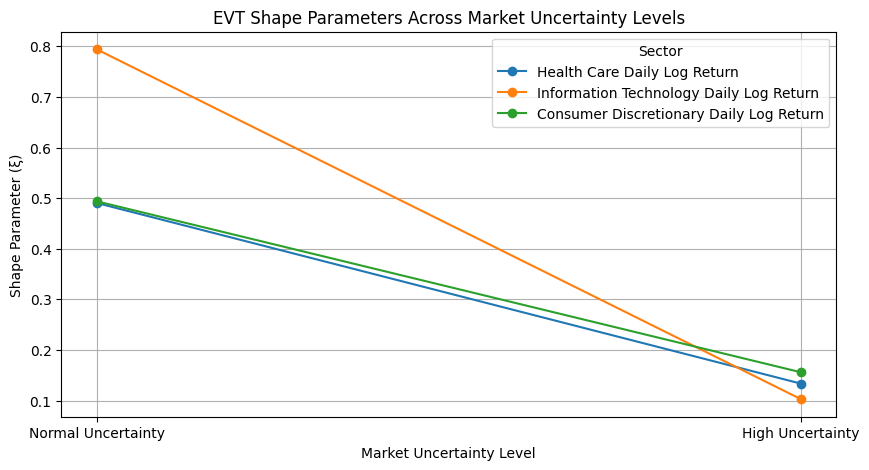

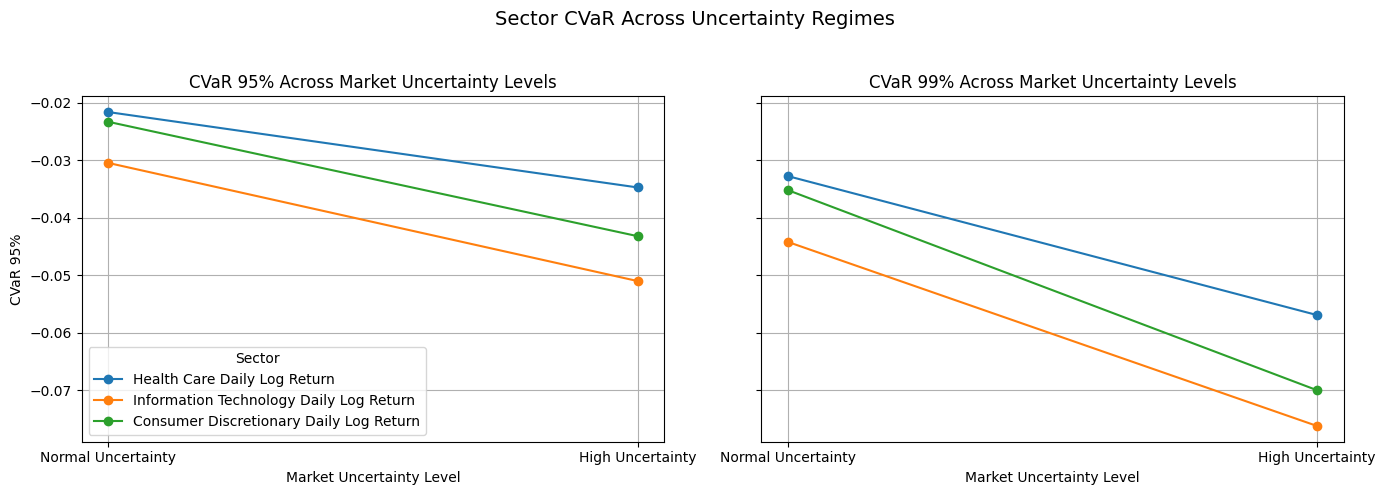

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Define market uncertainty labels for the x-axis
#uncertainty_labels = ['Low Uncertainty', 'Normal Uncertainty', 'High Uncertainty']
uncertainty_labels = ['Normal Uncertainty', 'High Uncertainty']
# Extract EVT Shape Parameters per sector
evt_shape_data = {sector: [evt_results[sector][regime]['Shape'] for regime in uncertainty_labels] for sector in sectors}
cvar_95_data = {sector: [cvar_results[sector][regime]['CVaR 95%'] for regime in uncertainty_labels] for sector in sectors}
cvar_99_data = {sector: [cvar_results[sector][regime]['CVaR 99%'] for regime in uncertainty_labels] for sector in sectors}

# Plot EVT Shape Parameters
plt.figure(figsize=(10, 5))
for sector, shape_values in evt_shape_data.items():
    plt.plot(uncertainty_labels, shape_values, marker='o', label=sector)

plt.xlabel("Market Uncertainty Level")
plt.ylabel("Shape Parameter (ξ)")
plt.title("EVT Shape Parameters Across Market Uncertainty Levels")
plt.legend(title="Sector")
plt.grid(True)
plt.show()

#import matplotlib.pyplot as plt

# Create 1 row x 2 columns figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot CVaR 95%
for sector, cvar_values in cvar_95_data.items():
    axes[0].plot(uncertainty_labels, cvar_values, marker='o', label=sector)
axes[0].set_title("CVaR 95% Across Market Uncertainty Levels")
axes[0].set_xlabel("Market Uncertainty Level")
axes[0].set_ylabel("CVaR 95%")
axes[0].grid(True)
axes[0].legend(title="Sector")

# Plot CVaR 99%
for sector, cvar_values in cvar_99_data.items():
    axes[1].plot(uncertainty_labels, cvar_values, marker='o', label=sector)
axes[1].set_title("CVaR 99% Across Market Uncertainty Levels")
axes[1].set_xlabel("Market Uncertainty Level")
axes[1].grid(True)

# Finalize layout
plt.suptitle("Sector CVaR Across Uncertainty Regimes", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



In [28]:
import numpy as np
import pandas as pd

# Bootstrap function for confidence intervals
def bootstrap_cvar(cvar_results, sector, n_bootstrap=10000, ci=95):
    boot_results = {}

    for regime in ['Normal Uncertainty', 'High Uncertainty']:
        cvar_values = list(cvar_results[sector][regime].values())  # Get CVaR 95% and 99% values

        # Bootstrap resampling
        boot_means = [np.mean(np.random.choice(cvar_values, size=len(cvar_values), replace=True)) for _ in range(n_bootstrap)]

        # Compute confidence intervals
        lower_bound = np.percentile(boot_means, (100 - ci) / 2)
        upper_bound = np.percentile(boot_means, 100 - (100 - ci) / 2)

        boot_results[regime] = {'Mean': np.mean(boot_means), 'Lower CI': lower_bound, 'Upper CI': upper_bound}

    return boot_results

# Compute bootstrap confidence intervals for each sector
bootstrap_results = {sector: bootstrap_cvar(cvar_results, sector) for sector in sectors}

# Convert results to DataFrame
bootstrap_df = pd.DataFrame.from_dict(
    {(sector, regime): values for sector, regimes in bootstrap_results.items() for regime, values in regimes.items()},
    orient='index'
)

# Format DataFrame for better readability
bootstrap_df = bootstrap_df.reset_index().rename(columns={'level_0': 'Sector', 'level_1': 'Market Uncertainty'})
bootstrap_df = bootstrap_df[['Sector', 'Market Uncertainty', 'Mean', 'Lower CI', 'Upper CI']]

# Display the formatted table
import tabulate
print(tabulate.tabulate(bootstrap_df, headers='keys', tablefmt='grid'))


+----+-----------------------------------------+----------------------+------------+------------+------------+
|    | Sector                                  | Market Uncertainty   |       Mean |   Lower CI |   Upper CI |
+====+=========================================+======================+============+============+============+
|  0 | Health Care Daily Log Return            | Normal Uncertainty   | -0.0271809 | -0.0327787 | -0.021651  |
+----+-----------------------------------------+----------------------+------------+------------+------------+
|  1 | Health Care Daily Log Return            | High Uncertainty     | -0.0459122 | -0.0569587 | -0.0347658 |
+----+-----------------------------------------+----------------------+------------+------------+------------+
|  2 | Information Technology Daily Log Return | Normal Uncertainty   | -0.0373214 | -0.0442193 | -0.0304961 |
+----+-----------------------------------------+----------------------+------------+------------+------------+
|

### WTI change classification

In [47]:
# Compute mean and standard deviation
mean_wti = data['WTI Log Daily Change'].mean()
std_wti = data['WTI Log Daily Change'].std()

# Define thresholds
data['WTI Change Category'] = pd.cut(
    data['WTI Log Daily Change'],
    bins=[-np.inf, mean_wti - std_wti, 0, mean_wti + std_wti, np.inf],
    labels=['Negative Big', 'Negative Small', 'Positive Small', 'Positive Big']
)

# Print sample classifications
data[['WTI Log Daily Change', 'WTI Change Category']].dropna().head()

,WTI Log Daily Change,WTI Change Category
Date,,
1993-05-05,0.002937,Positive Small
1993-05-06,0.001465,Positive Small
1993-05-07,-0.002933,Negative Small
1993-05-10,-0.000490,Negative Small
1993-05-11,-0.001961,Negative Small


In [48]:
data['WTI Change Category'].value_counts()

WTI Change Category
Positive Small    3321
Negative Small    3022
Negative Big       841
Positive Big       773
Name: count, dtype: int64

In [32]:
data

,VIX Close,WTI Log Daily Change,Information Technology Daily Log Return,Health Care Daily Log Return,Consumer Discretionary Daily Log Return,IT Volume,HC Volume,CD Volume,Uncertainty Regime,WTI Change Category
Date,,,,,,,,,,
1993-05-05,12.38,0.002937,0.008621,0.008757,-0.002610,0,0,0,Normal Uncertainty,Positive Small
1993-05-06,13.22,0.001465,-0.006131,-0.013274,-0.003120,0,0,0,Normal Uncertainty,Positive Small
1993-05-07,13.01,-0.002933,0.008729,-0.004760,-0.000605,0,0,0,Normal Uncertainty,Negative Small
1993-05-10,13.72,-0.000490,-0.000779,0.001220,0.005332,0,0,0,Normal Uncertainty,Negative Small
1993-05-11,13.35,-0.001961,-0.006381,0.002877,0.002706,0,0,0,Normal Uncertainty,Negative Small
...,...,...,...,...,...,...,...,...,...,...
2025-02-04,17.21,-0.006550,0.014612,-0.002688,0.014242,922290300,303546200,310625200,Normal Uncertainty,Negative Small
2025-02-05,15.77,-0.022849,0.015588,0.010153,-0.016031,934420400,240885300,384795100,Normal Uncertainty,Negative Small
2025-02-06,15.50,-0.005901,0.006531,-0.009423,0.004474,852093600,259759100,543027900,Normal Uncertainty,Negative Small


### Return across regimes

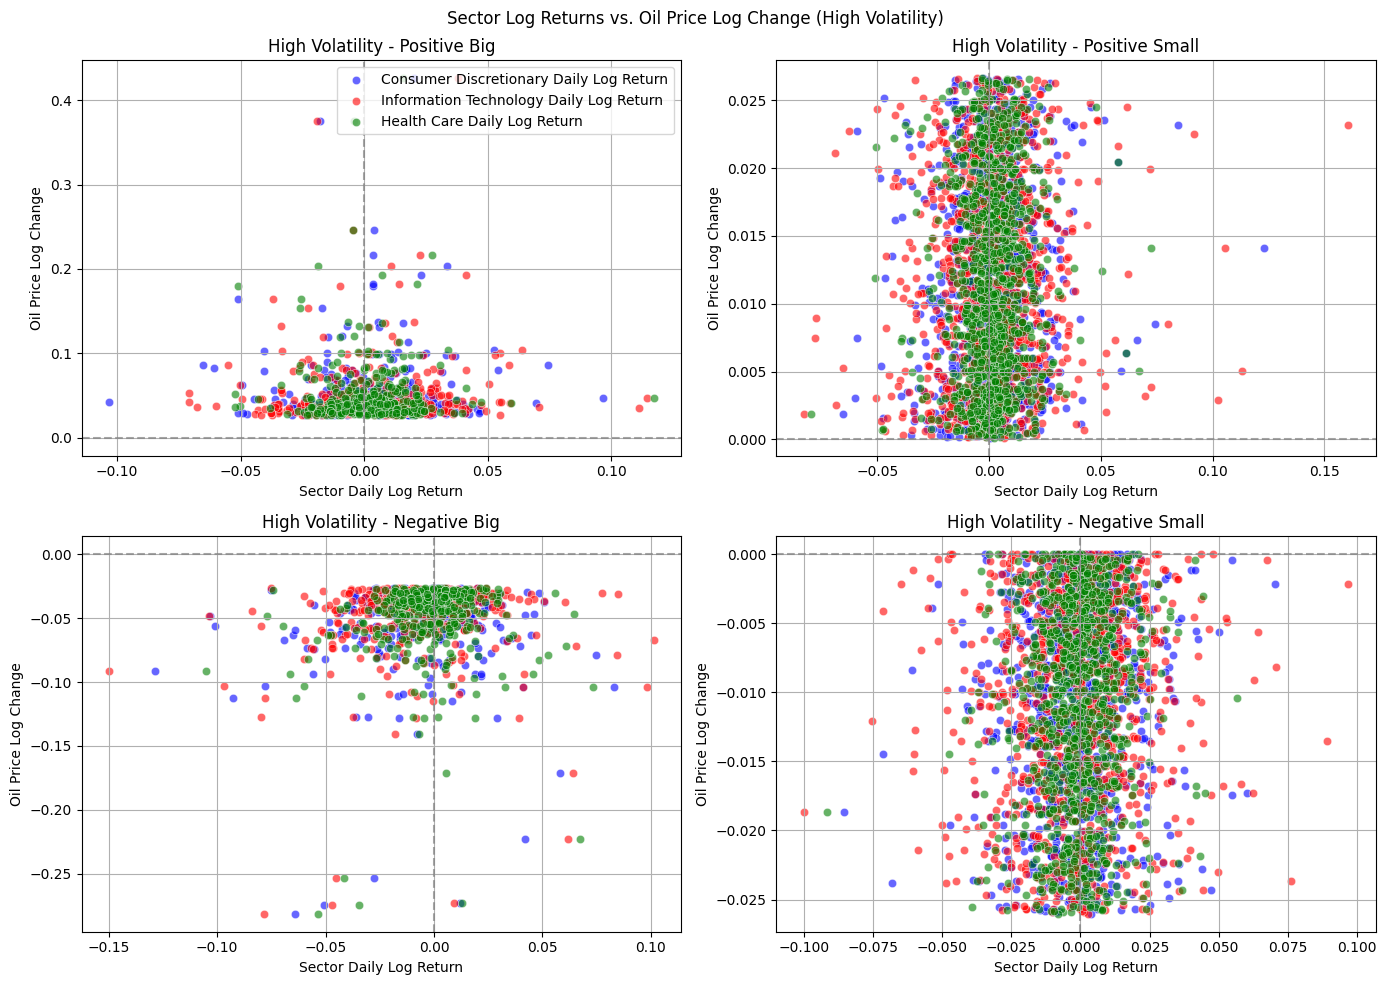

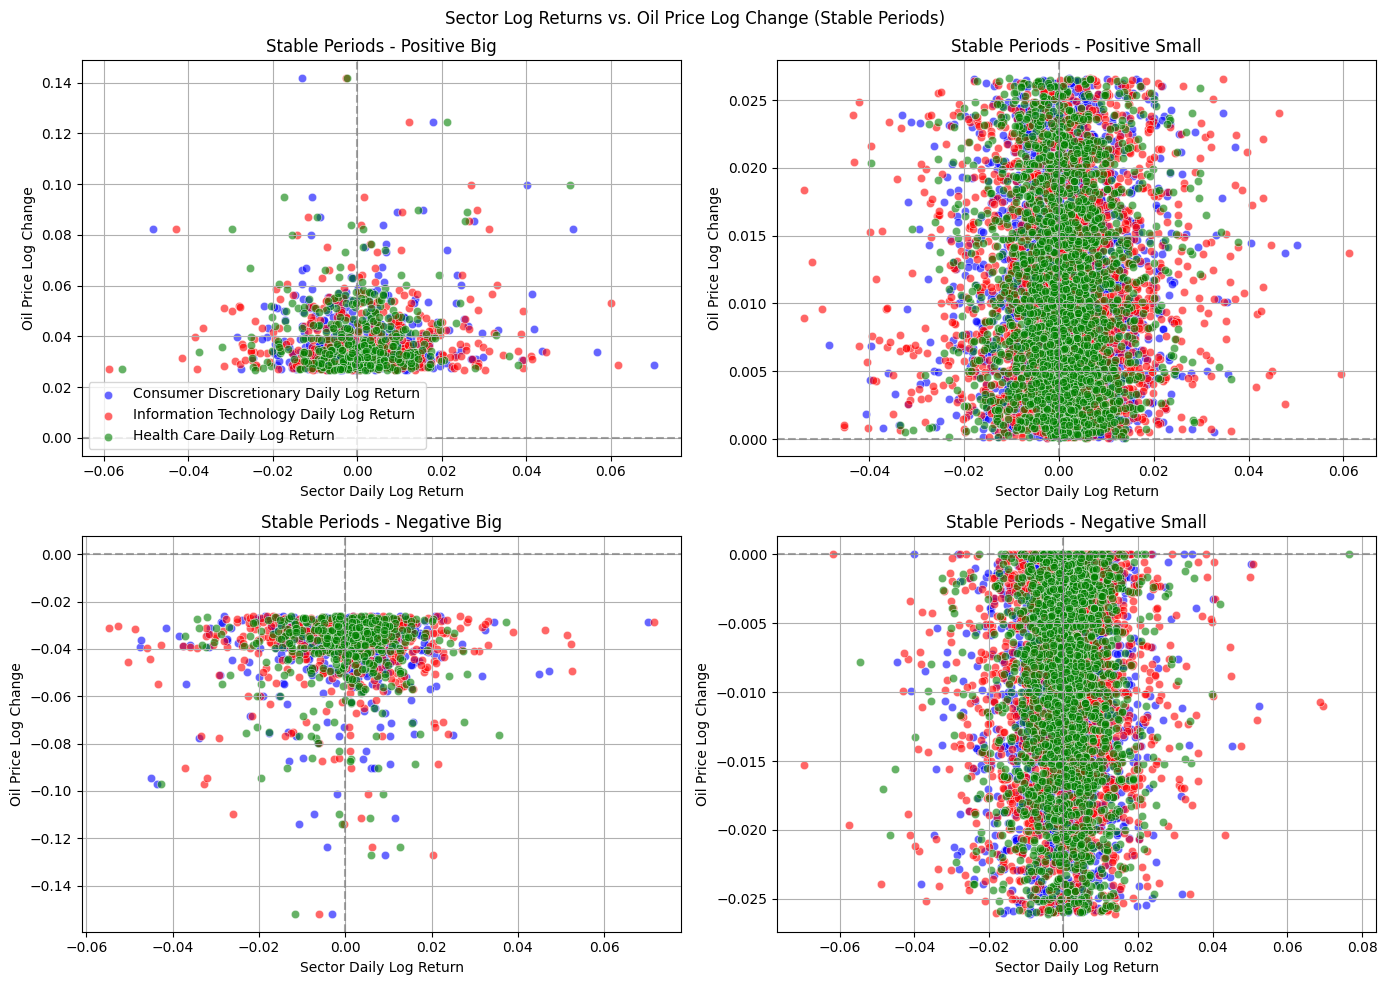

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------- CLASSIFY VOLATILITY REGIMES ----------------------
data['Volatility'] = np.where(data['Uncertainty Regime'] == 'High Uncertainty', 'High Uncertainty',
                                np.where(data['Uncertainty Regime'] == 'Normal Uncertainty', 'Normal Uncertainty', 'Normal Uncertainty'))


# ---------------------- SELECT SECTOR RETURNS ----------------------
sector_features = [
    "Consumer Discretionary Daily Log Return",
    "Information Technology Daily Log Return",
    "Health Care Daily Log Return"
]

# Define volatility scenarios
volatility_scenarios = {
    "High Volatility": data[data['Volatility'] == 'High Uncertainty'],
    "Stable Periods": data[data['Volatility'] == 'Normal Uncertainty']#,
    #"Low Volatility": data[data['Volatility'] == 'Low']
}

oil_change_types = ['Positive Big','Positive Small',  'Negative Big',  'Negative Small']

# Set consistent colors for sectors
sector_colors = {
    "Consumer Discretionary Daily Log Return": "blue",
    "Information Technology Daily Log Return": "red",
    "Health Care Daily Log Return": "green"
}

# ---------------------- CREATE SCATTER PLOTS ----------------------
for scenario_name, scenario_data in volatility_scenarios.items():
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, oil_change in enumerate(oil_change_types):
        subset = scenario_data[scenario_data['WTI Change Category'] == oil_change]

        ax = axes[i]
        for sector in sector_features:
            sns.scatterplot(data=subset, x=sector, y="WTI Log Daily Change",
                            color=sector_colors[sector], alpha=0.6, ax=ax, label=sector if i == 0 else "_nolegend_")

        ax.axvline(x=0, color='gray', linestyle='--', alpha=0.7)  # Vertical line at zero return
        ax.axhline(y=0, color='gray', linestyle='--', alpha=0.7)  # Horizontal line at zero oil change

        ax.set_title(f"{scenario_name} - {oil_change}")
        ax.set_xlabel("Sector Daily Log Return")
        ax.set_ylabel("Oil Price Log Change")
        ax.grid(False)
        

    # Add a common legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sector_colors[sector], markersize=10, label=sector) for sector in sector_features]
    #fig.legend(handles=handles, loc="upper right", title="Sectors")

    plt.suptitle(f"Sector Log Returns vs. Oil Price Log Change ({scenario_name})")
    plt.tight_layout()
    plt.show()


In [ ]:
import scipy.stats as stats

# Function to calculate mean, standard deviation, and confidence interval
def calculate_stats(data, confidence=0.95):
    mean = data.mean()
    std_dev = data.std()
    n = len(data)
    h = std_dev * stats.t.ppf((1 + confidence) / 2., n-1) / np.sqrt(n)
    return mean, std_dev, mean - h, mean + h

# Create a dictionary to store the results
results = []

# Calculate stats for each sector in each scenario and oil change type
for scenario_name, scenario_data in volatility_scenarios.items():
    for oil_change in oil_change_types:
        subset = scenario_data[scenario_data['WTI Change Category'] == oil_change]
        for sector in sector_features:
            mean, std_dev, ci_lower, ci_upper = calculate_stats(subset[sector])
            results.append({
                'Scenario': scenario_name,
                'Oil Change Type': oil_change,
                'Sector': sector,
                'Mean': mean,
                'Standard Deviation': std_dev,
                'CI Lower': ci_lower,
                'CI Upper': ci_upper
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df

,Scenario,Oil Change Type,Sector,Mean,Standard Deviation,CI Lower,CI Upper
0,High Volatility,Positive Big,Consumer Discretionary Daily Log Return,0.002928,0.021191,0.000706,0.005149
1,High Volatility,Positive Big,Information Technology Daily Log Return,0.004021,0.024950,0.001406,0.006637
2,High Volatility,Positive Big,Health Care Daily Log Return,0.002145,0.016201,0.000447,0.003843
3,High Volatility,Negative Big,Consumer Discretionary Daily Log Return,-0.004470,0.024138,-0.006877,-0.002064
4,High Volatility,Negative Big,Information Technology Daily Log Return,-0.006289,0.028458,-0.009126,-0.003452
5,High Volatility,Negative Big,Health Care Daily Log Return,-0.002677,0.019950,-0.004666,-0.000688
6,High Volatility,Positive Small,Consumer Discretionary Daily Log Return,0.001180,0.015588,0.000245,0.002115
7,High Volatility,Positive Small,Information Technology Daily Log Return,0.001234,0.020164,0.000024,0.002444
8,High Volatility,Positive Small,Health Care Daily Log Return,0.001241,0.012462,0.000494,0.001989
9,High Volatility,Negative Small,Consumer Discretionary Daily Log Return,-0.001036,0.015648,-0.002000,-0.000072


#### Kruskal-Wallis test to see if there is statistically significant difference between sector

There is significant difference between sectors when the oil is increasing slightly in stable market condition.

Overall

In [55]:
from scipy import stats

# Kruskal-Wallis test for each oil change category
categories = ['Positive Big', 'Negative Big', 'Positive Small', 'Negative Small']

for category in categories:
    hc_returns = data[data['WTI Change Category'] == category]['Health Care Daily Log Return']
    it_returns = data[data['WTI Change Category'] == category]['Information Technology Daily Log Return']
    cd_returns = data[data['WTI Change Category'] == category]['Consumer Discretionary Daily Log Return']
    
    h_stat, p_value = stats.kruskal(hc_returns, it_returns, cd_returns)
    
    print(f"Kruskal-Wallis Test for {category}: H = {h_stat}, p-value = {p_value}")


Kruskal-Wallis Test for Positive Big: H = 6.02828016976665, p-value = 0.04908802888113068
Kruskal-Wallis Test for Negative Big: H = 1.7557017391591216, p-value = 0.4156752928332198
Kruskal-Wallis Test for Positive Small: H = 5.769599685938353, p-value = 0.05586597038424086
Kruskal-Wallis Test for Negative Small: H = 0.6054203002423839, p-value = 0.7388132102579964


Since at least one difference between the sectors for positive normal has been detected, we will do a post-hoc analysis to determine which sectors differ for Positive Normal

In [56]:
for category in categories:
    hc_returns = data[data['WTI Change Category'] == category]['Health Care Daily Log Return']
    it_returns = data[data['WTI Change Category'] == category]['Information Technology Daily Log Return']
    cd_returns = data[data['WTI Change Category'] == category]['Consumer Discretionary Daily Log Return']

    # Mann-Whitney U tests between sectors
    u_hc_it, p_hc_it = stats.mannwhitneyu(hc_returns, it_returns)
    u_hc_cd, p_hc_cd = stats.mannwhitneyu(hc_returns, cd_returns)
    u_it_cd, p_it_cd = stats.mannwhitneyu(it_returns, cd_returns)

    print(f"Pairwise Mann-Whitney U Tests for {category}:")
    print(f"Health Care vs. Information Technology: U = {u_hc_it}, p-value = {p_hc_it}")
    print(f"Health Care vs. Consumer Discretionary: U = {u_hc_cd}, p-value = {p_hc_cd}")
    print(f"Information Technology vs. Consumer Discretionary: U = {u_it_cd}, p-value = {p_it_cd}\n")


Pairwise Mann-Whitney U Tests for Positive Big:
Health Care vs. Information Technology: U = 276921.0, p-value = 0.012819930287753563
Health Care vs. Consumer Discretionary: U = 290973.0, p-value = 0.37470989198358184
Information Technology vs. Consumer Discretionary: U = 311383.5, p-value = 0.15051408881941805

Pairwise Mann-Whitney U Tests for Negative Big:
Health Care vs. Information Technology: U = 366249.0, p-value = 0.2055495444503177
Health Care vs. Consumer Discretionary: U = 355017.0, p-value = 0.890116813589892
Information Technology vs. Consumer Discretionary: U = 343601.0, p-value = 0.3134739711564615

Pairwise Mann-Whitney U Tests for Positive Small:
Health Care vs. Information Technology: U = 5330515.5, p-value = 0.018528881658975517
Health Care vs. Consumer Discretionary: U = 5437792.0, p-value = 0.326119886475863
Information Technology vs. Consumer Discretionary: U = 5629015.0, p-value = 0.1428429510201087

Pairwise Mann-Whitney U Tests for Negative Small:
Health Care vs

Normal Volatility:

In [37]:
# Initialize a list to store the results
p_values = []

# Iterate through each oil change type
for oil_change in oil_change_types:
    # Get the data for the specified scenario and oil change type
    subset = data[(data['Volatility'] == 'Normal Uncertainty') & (data['WTI Change Category'] == oil_change)]
    subset = subset[sector_features]
    
    # Perform a Kruskal-Wallis test
    h_statistic, p_value = stats.kruskal(subset['Consumer Discretionary Daily Log Return'],
                                         subset['Information Technology Daily Log Return'],
                                         subset['Health Care Daily Log Return'])
    
    # Append the results to the list
    p_values.append({'Oil Change Type': oil_change, 'p-value': p_value})

# Convert the results to a DataFrame
p_values_df = pd.DataFrame(p_values)

# Display the results
p_values_df

,Oil Change Type,p-value
0,Positive Big,0.121213
1,Negative Big,0.973415
2,Positive Small,0.002074
3,Negative Small,0.547947


Significant difference between sectors when oil price is increasing slightly between sectors for normal market conditions

Turbulent Market:

In [38]:
# Initialize a list to store the results
p_values = []

# Iterate through each oil change type
for oil_change in oil_change_types:
    # Get the data for the specified scenario and oil change type
    subset = data[(data['Volatility'] == 'High Uncertainty') & (data['WTI Change Category'] == oil_change)]
    subset = subset[sector_features]
    
    # Perform a Kruskal-Wallis test
    h_statistic, p_value = stats.kruskal(subset['Consumer Discretionary Daily Log Return'],
                                         subset['Information Technology Daily Log Return'],
                                         subset['Health Care Daily Log Return'])
    
    # Append the results to the list
    p_values.append({'Oil Change Type': oil_change, 'p-value': p_value})

# Convert the results to a DataFrame
p_values_df = pd.DataFrame(p_values)

# Display the results
p_values_df

,Oil Change Type,p-value
0,Positive Big,0.224519
1,Negative Big,0.093773
2,Positive Small,0.899515
3,Negative Small,0.942479


Here there is only significant difference between sectors detected for small decrease in the oil price in a turbulent market.

#### Using Mann-Whitney U test to test these scenarios to detect which sectors are affected significantly differently

In [ ]:
# Mann-Whitney U test for comparing Health Care Return in the different Volatility Scenarios
normal_volatility = data[data['Volatility'] == 'Normal Uncertainty']['Health Care Daily Log Return']
high_volatility = data[data['Volatility'] == 'High Uncertainty']['Health Care Daily Log Return']

# Perform the Mann-Whitney U test
u_statistic_normal_high, p_value_normal_high = stats.mannwhitneyu(normal_volatility, high_volatility)

# Display the results
print("Health Care Daily Return: \n" )
print(f"Normal vs. High Volatility: U = {u_statistic_normal_high}, p-value = {p_value_normal_high}")

# Mann-Whitney U test for comparing Information Technology Return in the different Volatility Scenarios
normal_volatility = data[data['Volatility'] == 'Normal Uncertainty']['Information Technology Daily Log Return']
high_volatility = data[data['Volatility'] == 'High Uncertainty']['Information Technology Daily Log Return']

# Perform the Mann-Whitney U test
u_statistic_normal_high, p_value_normal_high = stats.mannwhitneyu(normal_volatility, high_volatility)

# Display the results
print("Information Technology Daily Return: \n" )
print(f"Normal vs. High Volatility: U = {u_statistic_normal_high}, p-value = {p_value_normal_high}")

# Mann-Whitney U test for comparing Consumer Discretionary Return in the different Volatility Scenarios
normal_volatility = data[data['Volatility'] == 'Normal Uncertainty']['Consumer Discretionary Daily Log Return']
high_volatility = data[data['Volatility'] == 'High Uncertainty']['Consumer Discretionary Daily Log Return']

# Perform the Mann-Whitney U test
u_statistic_normal_high, p_value_normal_high = stats.mannwhitneyu(normal_volatility, high_volatility)

# Display the results
print("Consumer Discretionary Daily Return: \n" )
print(f"Normal vs. High Volatility: U = {u_statistic_normal_high}, p-value = {p_value_normal_high}")


Health Care Daily Return: 

Normal vs. High Volatility: U = 7375252.5, p-value = 0.20187422223473106
Information Technology Daily Return: 

Normal vs. High Volatility: U = 7583404.0, p-value = 0.0006765909924405881
Consumer Discretionary Daily Return: 

Normal vs. High Volatility: U = 7401935.0, p-value = 0.12154293023650403


In [53]:
# Mann-Whitney U test for comparing Health Care Return in the different Oil Change Types
positive_high_hc = data[data['WTI Change Category'] == 'Positive Big']['Health Care Daily Log Return']
negative_high_hc = data[data['WTI Change Category'] == 'Negative Big']['Health Care Daily Log Return']
positive_normal_hc = data[data['WTI Change Category'] == 'Positive Small']['Health Care Daily Log Return']
negative_normal_hc = data[data['WTI Change Category'] == 'Negative Small']['Health Care Daily Log Return']

# Perform the Mann-Whitney U test
u_statistic_positive_negative_hc, p_value_positive_negative_hc = stats.mannwhitneyu(positive_high_hc, negative_high_hc)
u_statistic_positive_normal_hc, p_value_positive_normal_hc = stats.mannwhitneyu(positive_high_hc, positive_normal_hc)
u_statistic_negative_normal_hc, p_value_negative_normal_hc = stats.mannwhitneyu(negative_high_hc, positive_normal_hc)
u_statistic_positive_negative_normal_hc, p_value_positive_negative_normal_hc = stats.mannwhitneyu(positive_high_hc, negative_normal_hc)
u_statistic_negative_high_normal_hc, p_value_negative_high_normal_hc = stats.mannwhitneyu(negative_high_hc, negative_normal_hc)
u_statistic_positive_high_normal_hc, p_value_positive_high_normal_hc = stats.mannwhitneyu(positive_normal_hc, negative_normal_hc)

# Display the results
print("Health Care Daily Return: \n")
print(f"Positive Big vs. Negative Big: U = {u_statistic_positive_negative_hc}, p-value = {p_value_positive_negative_hc}")
print(f"Positive Big vs. Positive Small: U = {u_statistic_positive_normal_hc}, p-value = {p_value_positive_normal_hc}")
print(f"Negative Big vs. Positive Small: U = {u_statistic_negative_normal_hc}, p-value = {p_value_negative_normal_hc}")
print(f"Positive Big vs. Negative Small: U = {u_statistic_positive_negative_normal_hc}, p-value = {p_value_positive_negative_normal_hc}")
print(f"Negative Big vs. Negative Small: U = {u_statistic_negative_high_normal_hc}, p-value = {p_value_negative_high_normal_hc}")
print(f"Positive Small vs. Negative Small: U = {u_statistic_positive_high_normal_hc}, p-value = {p_value_positive_high_normal_hc} \n")

# Mann-Whitney U test for comparing Information Technology Return in the different Oil Change Types
positive_high_it = data[data['WTI Change Category'] == 'Positive Big']['Information Technology Daily Log Return']
negative_high_it = data[data['WTI Change Category'] == 'Negative Big']['Information Technology Daily Log Return']
positive_normal_it = data[data['WTI Change Category'] == 'Positive Small']['Information Technology Daily Log Return']
negative_normal_it = data[data['WTI Change Category'] == 'Negative Small']['Information Technology Daily Log Return']

# Perform the Mann-Whitney U test
u_statistic_positive_negative_it, p_value_positive_negative_it = stats.mannwhitneyu(positive_high_it, negative_high_it)
u_statistic_positive_normal_it, p_value_positive_normal_it = stats.mannwhitneyu(positive_high_it, positive_normal_it)
u_statistic_negative_normal_it, p_value_negative_normal_it = stats.mannwhitneyu(negative_high_it, positive_normal_it)
u_statistic_positive_negative_normal_it, p_value_positive_negative_normal_it = stats.mannwhitneyu(positive_high_it, negative_normal_it)
u_statistic_negative_high_normal_it, p_value_negative_high_normal_it = stats.mannwhitneyu(negative_high_it, negative_normal_it)
u_statistic_positive_high_normal_it, p_value_positive_high_normal_it = stats.mannwhitneyu(positive_normal_it, negative_normal_it)

# Display the results
print("Information Technology Daily Return: \n")
print(f"Positive Big vs. Negative Big: U = {u_statistic_positive_negative_it}, p-value = {p_value_positive_negative_it}")
print(f"Positive Big vs. Positive Small: U = {u_statistic_positive_normal_it}, p-value = {p_value_positive_normal_it}")
print(f"Negative Big vs. Positive Small: U = {u_statistic_negative_normal_it}, p-value = {p_value_negative_normal_it}")
print(f"Positive Big vs. Negative Small: U = {u_statistic_positive_negative_normal_it}, p-value = {p_value_positive_negative_normal_it}")
print(f"Negative Big vs. Negative Small: U = {u_statistic_negative_high_normal_it}, p-value = {p_value_negative_high_normal_it}")
print(f"Positive Small vs. Negative Small: U = {u_statistic_positive_high_normal_it}, p-value = {p_value_positive_high_normal_it} \n")

# Mann-Whitney U test for comparing Consumer Discretionary Return in the different Oil Change Types
positive_high_cd = data[data['WTI Change Category'] == 'Positive Big']['Consumer Discretionary Daily Log Return']
negative_high_cd = data[data['WTI Change Category'] == 'Negative Big']['Consumer Discretionary Daily Log Return']
positive_normal_cd = data[data['WTI Change Category'] == 'Positive Small']['Consumer Discretionary Daily Log Return']
negative_normal_cd = data[data['WTI Change Category'] == 'Negative Small']['Consumer Discretionary Daily Log Return']

# Perform the Mann-Whitney U testa
u_statistic_positive_negative_cd, p_value_positive_negative_cd = stats.mannwhitneyu(positive_high_cd, negative_high_cd)
u_statistic_positive_normal_cd, p_value_positive_normal_cd = stats.mannwhitneyu(positive_high_cd, positive_normal_cd)
u_statistic_negative_normal_cd, p_value_negative_normal_cd = stats.mannwhitneyu(negative_high_cd, positive_normal_cd)
u_statistic_positive_negative_normal_cd, p_value_positive_negative_normal_cd = stats.mannwhitneyu(positive_high_cd, negative_normal_cd)
u_statistic_negative_high_normal_cd, p_value_negative_high_normal_cd = stats.mannwhitneyu(negative_high_cd, negative_normal_cd)
u_statistic_positive_high_normal_cd, p_value_positive_high_normal_cd = stats.mannwhitneyu(positive_normal_cd, negative_normal_cd)

# Display the results
print("Consumer Discretionary Daily Return: \n")
print(f"Positive Big vs. Negative Big: U = {u_statistic_positive_negative_cd}, p-value = {p_value_positive_negative_cd}")
print(f"Positive Big vs. Positive Small: U = {u_statistic_positive_normal_cd}, p-value = {p_value_positive_normal_cd}")
print(f"Negative Big vs. Positive Small: U = {u_statistic_negative_normal_cd}, p-value = {p_value_negative_normal_cd}")
print(f"Positive Big vs. Negative Small: U = {u_statistic_positive_negative_normal_cd}, p-value = {p_value_positive_negative_normal_cd}")
print(f"Negative Big vs. Negative Small: U = {u_statistic_negative_high_normal_cd}, p-value = {p_value_negative_high_normal_cd}")
print(f"Positive Small vs. Negative Small: U = {u_statistic_positive_high_normal_cd}, p-value = {p_value_positive_high_normal_cd}\n")


Health Care Daily Return: 

Positive Big vs. Negative Big: U = 351789.0, p-value = 0.004250110295494579
Positive Big vs. Positive Small: U = 1302250.0, p-value = 0.5278916047788447
Negative Big vs. Positive Small: U = 1293238.0, p-value = 0.0009107442076485157
Positive Big vs. Negative Small: U = 1232965.0, p-value = 0.01686133032647555
Negative Big vs. Negative Small: U = 1227482.0, p-value = 0.13040379700527113
Positive Small vs. Negative Small: U = 5246133.0, p-value = 0.0017390257430353654 

Information Technology Daily Return: 

Positive Big vs. Negative Big: U = 376106.0, p-value = 4.796438133532219e-08
Positive Big vs. Positive Small: U = 1356919.0, p-value = 0.013201523230215945
Negative Big vs. Positive Small: U = 1234971.0, p-value = 2.1186033011169696e-07
Positive Big vs. Negative Small: U = 1289261.5, p-value = 8.170048975848414e-06
Negative Big vs. Negative Small: U = 1181929.0, p-value = 0.0019035568523094353
Positive Small vs. Negative Small: U = 5296479.0, p-value = 0.0

In [43]:
# Create a good table for the results of the Mann-Whitney U test. One column for each sector, comparison type as index and p-value as value
results = {
    "Health Care Daily Log Return": [p_value_positive_negative_hc, p_value_positive_normal_hc, p_value_negative_normal_hc, p_value_positive_negative_normal_hc, p_value_negative_high_normal_hc, p_value_positive_high_normal_hc],
    "Information Technology Daily Log Return": [p_value_positive_negative_it, p_value_positive_normal_it, p_value_negative_normal_it, p_value_positive_negative_normal_it, p_value_negative_high_normal_it, p_value_positive_high_normal_it],
    "Consumer Discretionary Daily Log Return": [p_value_positive_negative_cd, p_value_positive_normal_cd, p_value_negative_normal_cd, p_value_positive_negative_normal_cd, p_value_negative_high_normal_cd, p_value_positive_high_normal_cd]
}

# Convert the results to a DataFrame
results_df = pd.DataFrame(results, index=["Positive High vs. Negative High", "Positive High vs. Positive Normal", "Negative High vs. Positive Normal", "Positive High vs. Negative Normal", "Negative High vs. Negative Normal", "Positive Normal vs. Negative Normal"])

In [44]:
results_df

,Health Care Daily Log Return,Information Technology Daily Log Return,Consumer Discretionary Daily Log Return
Positive High vs. Negative High,0.004250,4.796438e-08,0.000300
Positive High vs. Positive Normal,0.527892,1.320152e-02,0.254604
Negative High vs. Positive Normal,0.000911,2.118603e-07,0.000331
Positive High vs. Negative Normal,0.016861,8.170049e-06,0.001245
Negative High vs. Negative Normal,0.130404,1.903557e-03,0.154380
Positive Normal vs. Negative Normal,0.001739,1.319961e-04,0.000085


Seems that Health Care is robust when comparing Positive High and Negative Normal as well as Negative High with Negative Normal.